In [108]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from math import sqrt

In [109]:
def errors(u, v):
    assert len(u)==len(v), "Размеры массивов не совпадают!"
    e_max = 0
    sum_rms = 0
    N = len(u)
    for j in range(N):
        delta = u[j] - v[j]
        if e_max < abs(delta):
            e_max = abs(delta)
            
        sum_rms += delta**2
        
    e_rms = sqrt(sum_rms/N)
    
    print("Максимальная погрешность: ", e_max)
    print("Среднеквадратичная погрешность: ", e_rms)

## Линейное уравнение переноса
$$
\begin{cases} 
    \frac{\partial f}{\partial t} + a\frac{\partial f}{\partial x} = 0, a > 0 \\
     \text{При } t = 0: f = f_0(x) > 0, x \in [0, L] \\
     \text{При } x = 0: f = f_1 = const
\end{cases}$$

In [184]:
a = 1    # > 0
f1 = 10

dx = 0.005
dt = 0.0045

N = 30
T = 50

In [185]:
def getPrecise(t):
    res = np.zeros(N)
    max_i = int(a*t/dx)+1
    if max_i > N:
        max_i = N
    for i in range(max_i):
        res[i] = f1
        
    return res

In [186]:
sigma = a*dt/dx
print("Число Куранта = ", sigma)

Число Куранта =  0.8999999999999999


### Схема Лакса

In [187]:
f = np.zeros((T,N))

for n in range(-1, T-1):
    f[n+1][0] = f1
    for i in range(1, N-1):
        A = f[n][i-1]
        B = f[n][i+1]
        f[n+1][i] = (B+A)/2 - sigma/2 * (B-A)
    f[n+1][N-1] = f[n][N-2]
    
    if n in (T//4, T//2, 3*T//4):
        print("Момент времени ", n*dt)
        errors(f[n], getPrecise(n*dt))

Момент времени  0.05399999999999999
Максимальная погрешность:  5.688000922764598
Среднеквадратичная погрешность:  1.460366042291523
Момент времени  0.11249999999999999
Максимальная погрешность:  6.431442457146122
Среднеквадратичная погрешность:  1.5507978584760844
Момент времени  0.16649999999999998
Максимальная погрешность:  0.31448709692836374
Среднеквадратичная погрешность:  0.08442771323285093


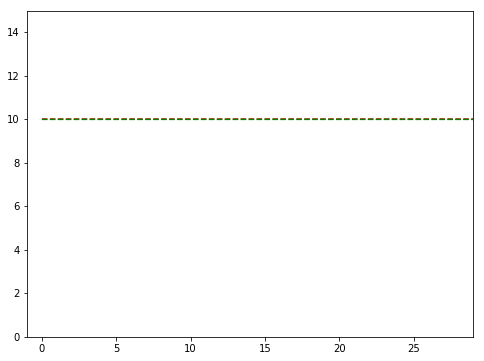

In [188]:
fig, ax = plt.subplots(figsize = (8, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'r', linestyle = '--')
ln2, = plt.plot([], [], color = 'g', linestyle = '--')

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    return ln,

def update(t):
    ydata2 = f[t]
    ydata = getPrecise(t*dt)
    ln.set_data(xdata, ydata)
    ln2.set_data(xdata, ydata2)
    return ln,

anim = FuncAnimation(fig, update, frames=range(T), init_func=init, blit=True)
HTML(anim.to_html5_video())

### Схема Лакса - Вендроффа

In [189]:
f = np.zeros((T,N))

for n in range(-1, T-1):
    f[n+1][0] = f1
    for i in range(1, N-1):
        A = f[n][i-1]
        E = f[n][i]
        B = f[n][i+1]
        
        fp = (B + E - sigma*(B - E))/2
        fn = (E + A - sigma*(E - A))/2
        
        f[n+1][i] = f[n][i] - sigma*(fp-fn)
    f[n+1][N-1] = f[n][N-2]
    
    if n in (T//4, T//2, 3*T//4):
        print("Момент времени ", n*dt)
        errors(f[n], getPrecise(n*dt))

Момент времени  0.05399999999999999
Максимальная погрешность:  5.515510826811671
Среднеквадратичная погрешность:  1.0614320366970225
Момент времени  0.11249999999999999
Максимальная погрешность:  3.935941738235151
Среднеквадратичная погрешность:  0.9101638486193427
Момент времени  0.16649999999999998
Максимальная погрешность:  0.3219571484815287
Среднеквадратичная погрешность:  0.06671160286732375


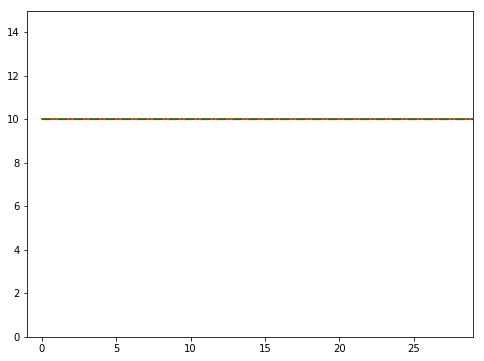

In [190]:
fig, ax = plt.subplots(figsize = (8, 6))
xdata, ydata = range(N), []
ln, = plt.plot([], [], color = 'r', linestyle = '-')
ln2, = plt.plot([], [], color = 'g', linestyle = '-.')

def init():
    ax.set_xlim(-1, N-1)
    ax.set_ylim(0, f1*1.5)
    return ln,

def update(t):
    ydata2 = f[t]
    ydata = getPrecise(t*dt)
    ln.set_data(xdata, ydata)
    ln2.set_data(xdata, ydata2)
    return ln,

anim = FuncAnimation(fig, update, frames=range(T), init_func=init, blit=True)
HTML(anim.to_html5_video())